<a href="https://colab.research.google.com/github/restiso7788/Linear_Regression_CellBox/blob/main/LR_Random_partition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import ast 
from matplotlib.lines import Line2D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
#change to your own data directory
df = pd.read_csv("/content/expert.csv")
df = df.iloc[:,1:]
df.head()

,4EBP1pS65,RbpS807,MAPKpT202,MEKpS217,S6,PAI-1,AKTpS473,AMPKpT172,b-Catenin,BIM,...,aHDAC,aMDM2,aJAK,aBRAFm,aPKC,aSTAT3,amTOR,aPI3K,aCDK4,aSRC
0,-0.435,-0.608,-0.855,-0.712,-0.113,-0.089,0.096,0.291,0.428,0.375,...,0.00,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.308,-0.322,-0.999,-0.594,0.022,-0.061,0.093,0.222,0.255,0.645,...,-0.89,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.402,-0.549,-0.837,-0.675,-0.011,-0.103,0.089,0.418,0.276,0.439,...,0.00,-0.393,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.475,-0.652,-0.935,-0.751,-0.085,-0.019,0.064,0.207,0.147,0.416,...,0.00,0.000,-0.474,0.000,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.611,-1.097,-1.234,-0.928,-0.114,-0.113,-0.002,-0.042,0.277,0.732,...,0.00,0.000,0.000,-0.552,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
"""
repreat the process 1000 times,Ys are the first 87 columns, Xs are the last 12 columns, 
Split training and testing by 70% and 30%
everytime, assign the X_test index to y_hat in order to store the rows used in X_test to
calcualte the average of Y_hat for each row
the final "new_df dataframe contains all rows for X_test(1000*89*30%)"
"""
new_df = pd.DataFrame()
for _ in range(1000):
  Y = df.iloc[:,:-12]
  X = df.iloc[:,-12:]
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3)
  lr = LinearRegression().fit(X_train, Y_train)
  y_hat = lr.predict(X_test)
  y_hat = pd.DataFrame(y_hat)
  #df = df.reindex(np.random.permutation(df.index))
  y_hat.index = X_test.index
  new_df = pd.concat([new_df, y_hat],axis = 0)
print(new_df.shape)

(27000, 87)


In [4]:
# calculate the average by row
df2 = new_df.groupby(new_df.index).mean()
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
0,-0.324333,-0.580486,-0.773659,-0.554918,-0.043850,-0.121456,0.116000,0.036327,0.414262,0.459566,...,-0.103379,0.008248,0.137850,0.069374,0.188880,0.030187,0.450403,0.004565,0.029683,0.199078
1,-0.443122,-0.500324,-0.999048,-0.493626,-0.189988,0.053995,0.123681,0.046081,0.105269,0.573736,...,-0.120171,0.011587,0.206706,-0.054210,0.051542,-0.032963,0.363070,1.488581,-0.127159,0.298428
2,-0.454036,-0.621291,-0.873106,-0.618155,-0.177165,-0.072870,0.021278,0.015559,0.247125,0.411276,...,-0.065808,0.000570,0.076408,0.043171,0.240838,0.223867,0.383036,0.154932,0.084179,0.254434
3,-0.283485,-0.649977,-0.927284,-0.560733,-0.058153,-0.111815,0.067982,0.131564,0.229666,0.435291,...,-0.071143,-0.017277,0.095608,0.057438,0.183630,0.205745,0.423213,0.062456,0.050261,0.468732
4,-0.367835,-0.856458,-1.343997,-1.107952,-0.108887,-0.224996,0.314336,0.300114,0.416531,0.571545,...,-0.041195,0.010454,0.195500,0.077014,0.287471,-0.155710,0.678328,-0.021836,-0.001655,0.659792


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Pearson’s correlation')

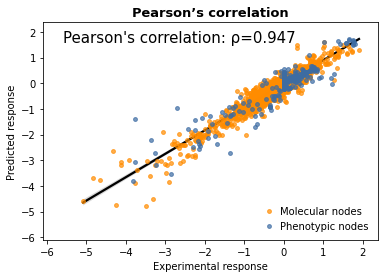

In [13]:
#only keep all Ys columns for ploting
df_y = df.iloc[:,:-12]

x_all = df_y.values.flatten()
y_all = df2.values.flatten()

x_prot = df.iloc[:,0:82]
y_prot = df2.iloc[:,0:82]
x_pheno = df.iloc[:,82:87]
y_pheno = df2.iloc[:,82:87]
plt.scatter(x_prot, y_prot, s = 15, alpha = 0.7, color="darkorange",zorder=3)
#plt.scatter(x_prot, y_prot, s = 15, alpha = 0.7, color="#FC5A5B",zorder=3)
plt.scatter(x_pheno, y_pheno, s = 15, alpha = 0.7, color="#3D6CA3",zorder=4)
#plt.scatter(x_pheno, y_pheno, s = 15, alpha = 0.7, color="#FECD7F",zorder=4)
plt.legend(["Molecular nodes","Phenotypic nodes"], loc="lower right", frameon=False,
          handletextpad=0.1)
plt.plot([-10, 10], [-10, 10], c = 'white', alpha = 0, ls = '--')
#plt.scatter(x_all, y_all, s = 15, alpha = 0.6)
sns.regplot(x_all, y_all, scatter_kws={'s': 15, 'alpha': 0},line_kws={'color': 'black', 'alpha': 1})
#sns.regplot(x_all, y_all, scatter_kws={'s': 15, 'alpha': 0},line_kws={'color': '#F18A64', 'alpha': 1})

plt.xticks(np.arange(-6,3))
plt.yticks(np.arange(-6,3))
#plt.grid(True, which='both')

lower = np.min([x_all, y_all])
upper = np.max([x_all, y_all])
plt.xlim([lower*1.2, upper*0.9])
plt.ylim([lower*1.2, upper*0.9])

r = np.corrcoef(x_all, y_all)[0][1]
plt.text(x = -5.6, y= 1.6, s='Pearson\'s correlation: ρ=%1.3f'%r,
        size = 15)
plt.xlabel('Experimental response')
plt.ylabel('Predicted response')
plt.title("Pearson’s correlation", 
         weight='bold', size=13)